In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import Levenshtein

In [47]:
# For each file, count the year/reduction length for each line
# Also count the failures
def count_reduction(name):

    data_df = pd.read_csv(f'../../../data/processed/aggregated_de-en_bleurt-20-d12.csv')
    df = pd.read_csv(f'{name}.csv')
    failed_df = pd.read_csv(f'{name}_failed.csv')

    # out = {year: [#deletion, ...], ...}
    out = {}
    sent_lens = {
        'year': [],
        'sent_len': []
    }
    
    for line_idx in range(len(df)):

        # Filter out short refs
        if len(df['ref'][line_idx].split(' ')) < 10:
            continue

        data_idx = df['idx'][line_idx]
        year = data_df['year'][data_idx]
        mt_sys = data_df['mt_sys'][data_idx]
        
        if year not in out.keys():
            out[year] = []

        len_diff = len(df['mt'][line_idx].split(' ')) - len(df['adv'][line_idx].split(' '))

        out[year].append(len_diff)

        sent_lens['year'].append(year)
        sent_lens['sent_len'].append(len(df['mt'][line_idx].split(' ')))
    
    failed_out = {}

    for line_idx in range(len(failed_df)):

        data_idx = failed_df['0'][line_idx]
        year = data_df['year'][data_idx]
        mt_sys = data_df['mt_sys'][data_idx]
        
        if year not in failed_out.keys():
            failed_out[year] = 0

        len_diff = len(df['mt'][line_idx].split(' ')) - len(df['adv'][line_idx].split(' '))

        failed_out[year] += 1

    return out, failed_out, sent_lens

bleurt_out, bleurt_failed_out, sent_lens = count_reduction('20-d12_input_reduction_aggregated_de-en_bleurt-20-d12_bleurt_bleurt-20-d12_down_1.0')
bertscore_out, bertscore_failed_out, sent_lens = count_reduction('bertscore_input_reduction_aggregated_de-en_bertscore_bertscore_down_1.0')

In [25]:
def dict_to_df(d):
    out = {
        'year': [],
        '# deletion': []
    }
    for year, lens in d.items():
        for l in lens:
            out['year'].append(year)
            out['# deletion'].append(l)
    df = pd.DataFrame(out)
    return df

<AxesSubplot:xlabel='# deletion', ylabel='Probability'>

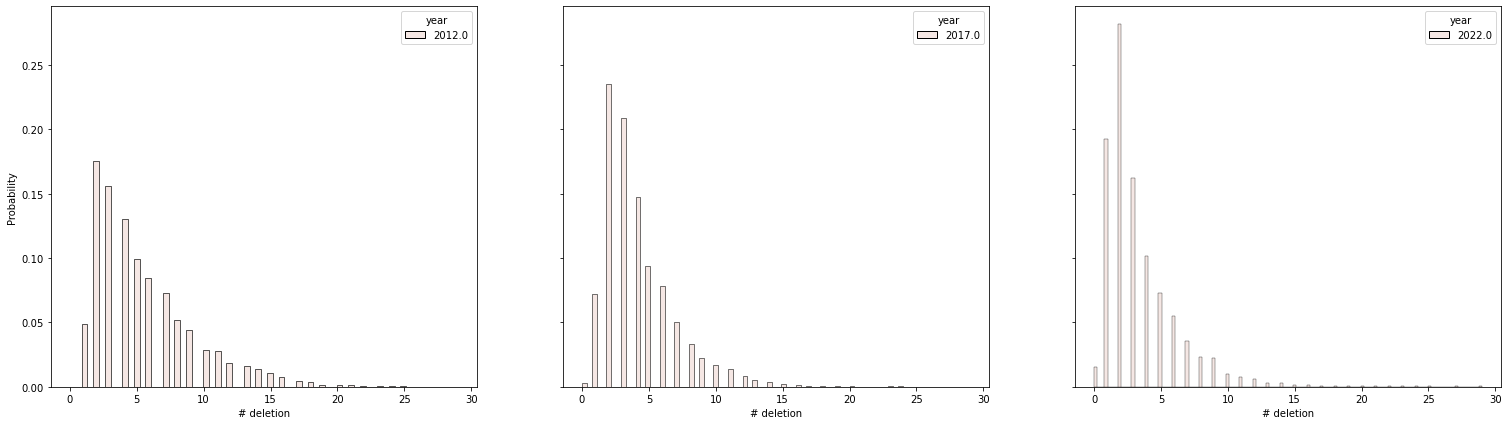

In [40]:
df = dict_to_df(bleurt_out)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (26, 7), sharey = True, sharex=True)

sns.histplot(df.where(df['year'] == 2012), x='# deletion', stat='probability', hue='year', ax=ax1)
sns.histplot(df.where(df['year'] == 2017), x='# deletion', stat='probability', hue='year', ax=ax2)
sns.histplot(df.where(df['year'] == 2022), x='# deletion', stat='probability', hue='year', ax=ax3)

<AxesSubplot:xlabel='# deletion', ylabel='Probability'>

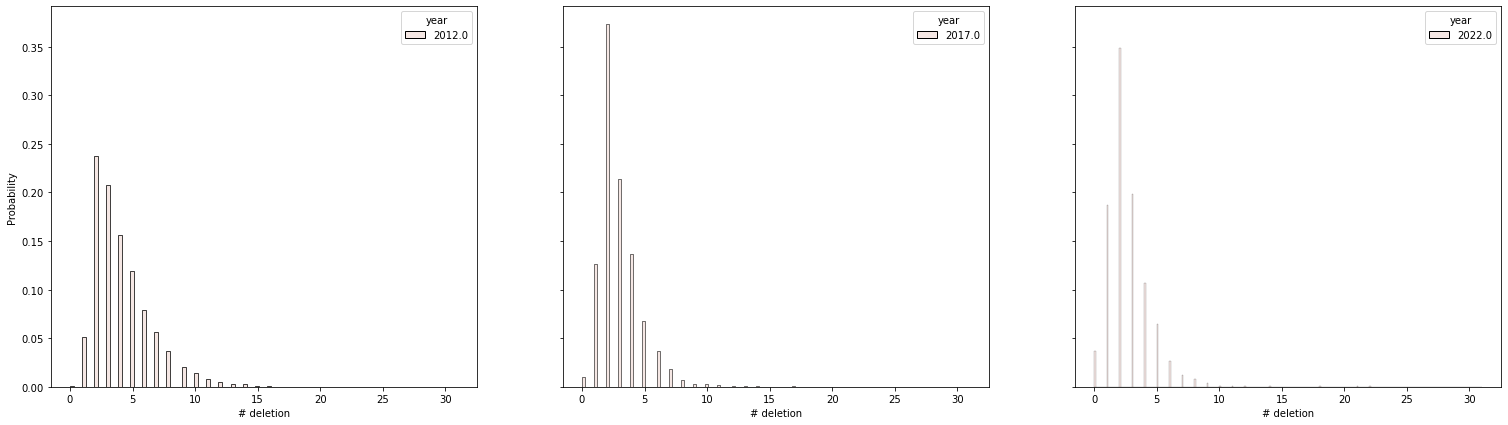

In [41]:
df = dict_to_df(bertscore_out)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (26, 7), sharey = True, sharex=True)

sns.histplot(df.where(df['year'] == 2012), x='# deletion', stat='probability', hue='year', ax=ax1)
sns.histplot(df.where(df['year'] == 2017), x='# deletion', stat='probability', hue='year', ax=ax2)
sns.histplot(df.where(df['year'] == 2022), x='# deletion', stat='probability', hue='year', ax=ax3)

<AxesSubplot:xlabel='sent_len', ylabel='Probability'>

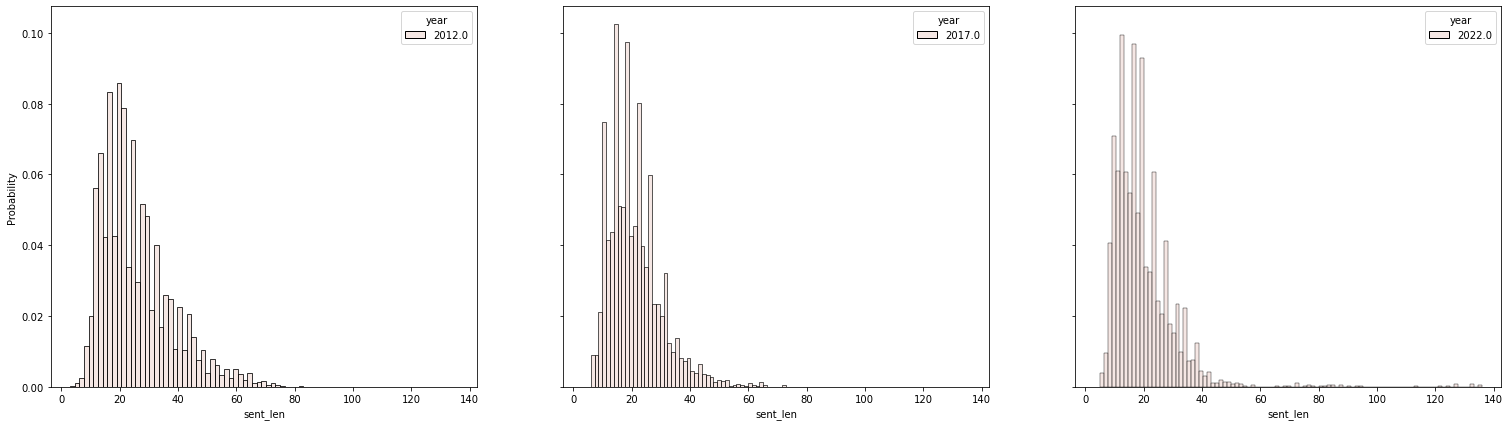

In [42]:
df = pd.DataFrame(sent_lens)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (26, 7), sharey = True, sharex=True)

sns.histplot(df.where(df['year'] == 2012), x='sent_len', stat='probability', hue='year', ax=ax1)
sns.histplot(df.where(df['year'] == 2017), x='sent_len', stat='probability', hue='year', ax=ax2)
sns.histplot(df.where(df['year'] == 2022), x='sent_len', stat='probability', hue='year', ax=ax3)

In [49]:
print(bleurt_failed_out)
print(bertscore_failed_out)

{2012: 751, 2017: 193, 2022: 136}
{2012: 243, 2017: 46, 2022: 60}
